,Title,Price,Location,Link
0,Surrey luxury 3 level townhouse 3 bed plus Den,"$3,900",Surrey,https://vancouver.craigslist.org/rds/apa/d/sur...
1,Laneway house,"$2,100",East vancouver,https://vancouver.craigslist.org/van/apa/d/van...
2,"Luxury Vinyl Plank Flooring, Pet Friendly, 1 b...","$2,475","1371 Blackwood Street, White Rock, BC",https://vancouver.craigslist.org/rds/apa/d/whi...
3,"Microwave, Pendant Lighting, Pet Wash Station","$3,586","303 E Pender St, Vancouver, BC",https://vancouver.craigslist.org/van/apa/d/van...
4,JUST LIST!! SFU 1 Bedroom Apartment to Rent,"$2,300",Burnaby,https://vancouver.craigslist.org/bnc/apa/d/bur...
...,...,...,...,...
351,2 Bed 2 Baths in best location in Richmond,"$3,200",Richmond,https://vancouver.craigslist.org/van/apa/d/ric...
352,1461 Kingsway,"$1,700",Vancouver,https://vancouver.craigslist.org/van/apa/d/van...
353,Single detached house for rent $9000,"$9,000",Vancouver,https://vancouver.craigslist.org/rch/apa/d/van...
354,Exquisite Coach-House Suite in Tsawwassen One ...,"$2,095",Tsawwassen,https://vancouver.craigslist.org/rds/apa/d/del...


,Title,Price,Location,Link
1,Surrey luxury 3 level townhouse 3 bed plus Den,3900.0,Surrey,https://vancouver.craigslist.org/rds/apa/d/sur...
2,Laneway house,2100.0,East vancouver,https://vancouver.craigslist.org/van/apa/d/van...
3,"Luxury Vinyl Plank Flooring, Pet Friendly, 1 b...",2475.0,"1371 Blackwood Street, White Rock, BC",https://vancouver.craigslist.org/rds/apa/d/whi...
4,"Microwave, Pendant Lighting, Pet Wash Station",3586.0,"303 E Pender St, Vancouver, BC",https://vancouver.craigslist.org/van/apa/d/van...
5,JUST LIST!! SFU 1 Bedroom Apartment to Rent,2300.0,Burnaby,https://vancouver.craigslist.org/bnc/apa/d/bur...
...,...,...,...,...
337,2 bedroom suite for rent,2299.0,North Vancouver,https://vancouver.craigslist.org/nvn/apa/d/nor...
338,2 Bed 2 Baths in best location in Richmond,3200.0,Richmond,https://vancouver.craigslist.org/van/apa/d/ric...
339,1461 Kingsway,1700.0,Vancouver,https://vancouver.craigslist.org/van/apa/d/van...
340,Exquisite Coach-House Suite in Tsawwassen One ...,2095.0,Tsawwassen,https://vancouver.craigslist.org/rds/apa/d/del...


,Price
count,341.000000
mean,2562.046921
std,825.679220
min,375.000000
25%,2000.000000
50%,2475.000000
75%,3100.000000
max,4950.000000


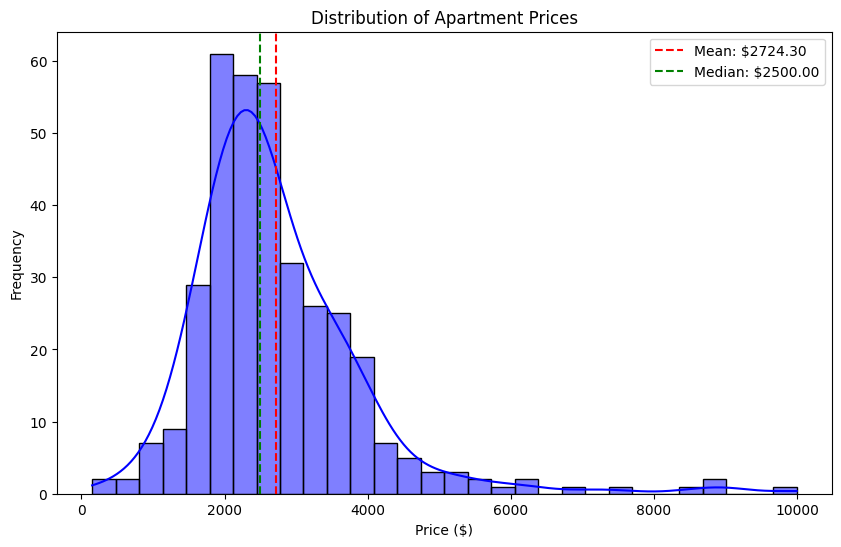

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Scraping Listings
url = "https://vancouver.craigslist.org/search/apa"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extracting relevant information
titles, prices, locations, links = [], [], [], []

for listing in soup.find_all('li', class_='cl-static-search-result')[:360]:  # Limit to ~360 listings
    title = listing.find('div', class_='title').text.strip() if listing.find('div', class_='title') else None
    price = listing.find('div', class_='price').text.strip() if listing.find('div', class_='price') else None
    location_tag = listing.find('div', class_='location')
    location = location_tag.text.strip() if location_tag else None
    link = listing.find('a', class_='')['href'] if listing.find('a', class_='') else None
    
    titles.append(title)
    prices.append(price)
    locations.append(location)
    links.append(link)

# Step 2: Building DataFrame
data = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Location': locations,
    'Link': links
})
data = data.drop_duplicates()

display(data)
data.to_csv('craigslist_listings.csv', index=False)
# Step 3: Data Cleaning and Preprocessing
# Cleaning 'Price' column
data['Price'] = data['Price'].str.replace(r'\$', '', regex=True).str.replace(',', '', regex=True).astype(float)

# Handling missing values
data = data.dropna(subset=['Price'])

# Step 4: Detect and handle outliers in the Price column
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

# Step 5: Reset the index to start from 1
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.index += 1

display(cleaned_data)

# Return summaries of missing values and the cleaned data description
display(cleaned_data.describe())


# Step 4: Initial EDA
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.axvline(data['Price'].mean(), color='red', linestyle='--', label=f"Mean: ${data['Price'].mean():.2f}")
plt.axvline(data['Price'].median(), color='green', linestyle='--', label=f"Median: ${data['Price'].median():.2f}")
plt.title("Distribution of Apartment Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
